### Problem Statement
DonorsChoose.org wants to predict whether or not a project proposal submitted by a teacher will be approved.

*   How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
*   How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
*   How to focus volunteer time on the applications that need the most assistance



### Importing Important Libraries

In [ ]:
# libraries to display df and images
from IPython.display import display
from PIL import Image
from pprint import pprint

# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels as sm
from pylab import *

# Inbuilt library to work with textual data
import string
import re

# Setting up the NLTK to pre-processing textual data
import spacy
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
!pip install contractions
import contractions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

# Ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


### Understanding the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DonorsChoose/train_data.csv')
print(f"Shape of dataframe : {df.shape}")
df.head(2)

Shape of dataframe : (109248, 17)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [ ]:
print(f"Shape of dataframe : {df.shape}")

Shape of dataframe : (109248, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

### Data Cleaning and Analysing Basic Metrics

In [ ]:
df["Unnamed: 0"].nunique()
# We can safely drop the column because df.nunique for the "Unnamed: 0" Column is the same as the total number of unique records.

# drop the "Unnamed: 0" Column
# df.drop(df.columns[df.columns.str.contains('Unnamed: 0',case = False)], axis = 1, inplace = True)

109248

In [ ]:
#Set the index start to 1
df.index += 1
df = df.set_index(df.index)
df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
1,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
2,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [ ]:
# Update the datatypes for categorical and datetime attributes

# categorical coulmns
cols = list(df.columns[1:9].values)
cols.remove('project_submitted_datetime')
cols.append('project_is_approved')
for i in cols:
  df = df.astype({i:'category'})

# datetime coulmns
df = df.astype({"project_submitted_datetime":'datetime64[ns]'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 1 to 109248
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Unnamed: 0                                    109248 non-null  int64         
 1   id                                            109248 non-null  category      
 2   teacher_id                                    109248 non-null  category      
 3   teacher_prefix                                109245 non-null  category      
 4   school_state                                  109248 non-null  category      
 5   project_submitted_datetime                    109248 non-null  datetime64[ns]
 6   project_grade_category                        109248 non-null  category      
 7   project_subject_categories                    109248 non-null  category      
 8   project_subject_subcategories                 109248 n

#### Feature Engineering

*   **project_submitted_month** : </br>
The month of the year in which the project has been submitted for approval.
*   **project_submitted_year** : </br>
The year in which the project has been submitted for approval.
*   **price** : </br>
The estimated price of the project based on an aggregation of similar project ideas.
*   **teacher_gender** : </br>
This attribute provides information about the gender of the teacher who has submitted the project for approval.

In [ ]:
# extract month and year of the project submission
df['project_submitted_month'] = df['project_submitted_datetime'].dt.month
df['project_submitted_year'] = df['project_submitted_datetime'].dt.year

df = df.astype({'project_submitted_month':'category','project_submitted_year':'category' })

- Use `resource.csv` to create a new feature `price` which is an estimated price of the project.

In [ ]:
# load the resource.csv data.
resources = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DonorsChoose/resources.csv')

# create a new feature to calculate the total amount per project id.
resources['amount'] = np.round(resources['quantity'] * resources['price'],3)

# group the data by project id and find the mean value per project id and round it to 3 decimal places.
groups = resources.groupby('id').mean().reset_index()
groups.drop(['quantity','price'], axis = 1, inplace = True)
groups.rename(columns={'id':'p_id','amount':'price'}, inplace = True)
groups = groups.round(3)

# merge the price column to the original df on basis of the matching project id
df = df.merge(groups, left_on='id', right_on='p_id')
df.drop(['p_id'], axis = 1, inplace = True)

df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,project_submitted_month,project_submitted_year,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,12,2016,85.194
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,10,2016,299.000


- Use the `teacher_prefix` attribute to add a new feature `teacher_gender` to help clarify the purpose and meaning of the column.

In [ ]:
df['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [ ]:
df['teacher_gender'] = df['teacher_prefix'].apply(lambda x: 'Female' if x in ['Mrs.','Ms.'] else 'Male' if x=='Mr.' else 'Other')
df = df.astype({'teacher_gender':'category'})
df['teacher_gender'].value_counts()

Female    96224
Male      10648
Other      2373
Name: teacher_gender, dtype: int64

- Clean the `project_resource_summary` and `project_essay` feature columns

In [ ]:
# Combine the project essay columns into a single column
essay_cols = ['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary']
df['project_essay'] = df[essay_cols].astype(str).apply(lambda col: ' '.join(col.dropna()), axis=1)

# Replace the special characters using regex with empty string
punctuations = string.punctuation
escaped_punctuations = re.escape(punctuations)
special_chars = [r"'",r'\\r\\n', r'\\"', '-', r'nan']

df['project_essay'].replace(escaped_punctuations , '', regex=True, inplace=True)
df['project_essay'].replace(special_chars, '', regex=True, inplace=True)

In [ ]:
# Use Pretty print to display the statements that are printed in a nicely formatted manner with each statement on a separate line, making it more readable
from pprint import pprint
pprint(df.iloc[1]['project_essay'], compact=True)

('Our students arrive to our school eager to learn. They are polite, generous, '
 'and strive to be the best they can be. They know that with an education, '
 'they can succeed in life and help improve on the lives that they have '
 'now.Our school focuses on families with low incomes and tries to give each '
 'student the education they deserve. While we do not have much, the students '
 'use the materials they are given and do the very best they can with them. '
 'The projector we need for our school is very crucial for the academic '
 'improvement of our students. As technology continues to grow, there are so '
 'many resources in the internet that we as teachers use to further the growth '
 'of our students. However, our school is very limited with resources  '
 'particularly, technology  and without it, we are at a disadvantage. One of '
 'the things that could really help our classrooms is a projector.With a '
 'projector, not only is it crucial with instruction, but also for the

In [ ]:
# NOT DROPPING THE `Other` CATEGORY FROM `teacher_gender`.

# checking the proportion of data points in the dataset where the "teacher_gender" is classified as "Other."
# (len(df[df['teacher_gender']=='Other'])/df['teacher_gender'].value_counts().sum()).round(3) # 0.022

# Considering that the category "Other" in the "teacher_gender" feature constitutes only approximately 0.022% of the entire dataset, it would be advisable to drop the data points associated with this category.
# Drop data points with 'Other' category
# df = df[df['teacher_gender'] != 'Other'].copy()


#### Missing Value Detection and Treatment

In [ ]:
# checking null values in the data
df.isnull().sum()/len(df) * 100

Unnamed: 0                                       0.000000
id                                               0.000000
teacher_id                                       0.000000
teacher_prefix                                   0.002746
school_state                                     0.000000
project_submitted_datetime                       0.000000
project_grade_category                           0.000000
project_subject_categories                       0.000000
project_subject_subcategories                    0.000000
project_title                                    0.000000
project_essay_1                                  0.000000
project_essay_2                                  0.000000
project_essay_3                                 96.560120
project_essay_4                                 96.560120
project_resource_summary                         0.000000
teacher_number_of_previously_posted_projects     0.000000
project_is_approved                              0.000000
project_submit

- As a result, we can choose to retain the data points while utilizing the information from other columns for our analysis.

In [ ]:
# We have roughly 0.002746% missing records for the below mentioned attributes, which can be eliminated given the numerous dataset.
# dropping the datapoints with missing values
df.dropna(subset=['teacher_prefix','teacher_gender'],inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,...,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,project_submitted_month,project_submitted_year,price,teacher_gender,project_essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,...,NaN,NaN,My students need opportunities to practice beg...,0,0,12,2016,85.194,Female,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,...,NaN,NaN,My students need a projector to help with view...,7,1,10,2016,299.000,Male,Our students arrive to our school eager to lea...


#### Outlier Detection and Treatment

In [ ]:
df.describe(include=['category'])

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_is_approved,project_submitted_month,project_submitted_year,teacher_gender
count,109245,109245,109245,109245,109245,109245,109245,109245,109245,109245
unique,72165,5,51,4,51,401,2,12,2,3
top,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,Grades PreK-2,Literacy & Language,Literacy,1,8,2016,Female
freq,44,57269,15387,44225,23654,9486,92703,19980,78963,96224


In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,109245.0,91184.471967,52547.536115,0.000,45746.000,91254.0,136712.0,182079.0
teacher_number_of_previously_posted_projects,109245.0,11.153462,27.777477,0.000,0.000,2.0,9.0,451.0
price,109245.0,256.806804,418.004484,2.129,50.081,126.0,304.3,12344.0


*   From categorical columns:

    *   The majority of projects are approved from the `Literacy and Language` project subject category.
    *   The majority of projects that are approved have a project grade category as `Grades PreK_2`.
    *   The majority of the projects submitted were requested for approval by `female` teachers.


*   From numerical columns:

    *   The maximum values for the columns `teacher_number_of_previously_posted_projects` and `price` are significantly higher than the 75th percentile. This suggests the presence of outliers on the higher end of the distribution.

    *   Furthermore, for the aforementioned columns `mean >> median` which confirms the presence of outlier data points.
    *   To handle these outliers, various approaches can be considered, such as winsorization or logarithmic transforming of the variable to reduce the impact of extreme values.







- Plot the distribution of the feature teacher_number_of_previously_posted_projects and remove the outliers.

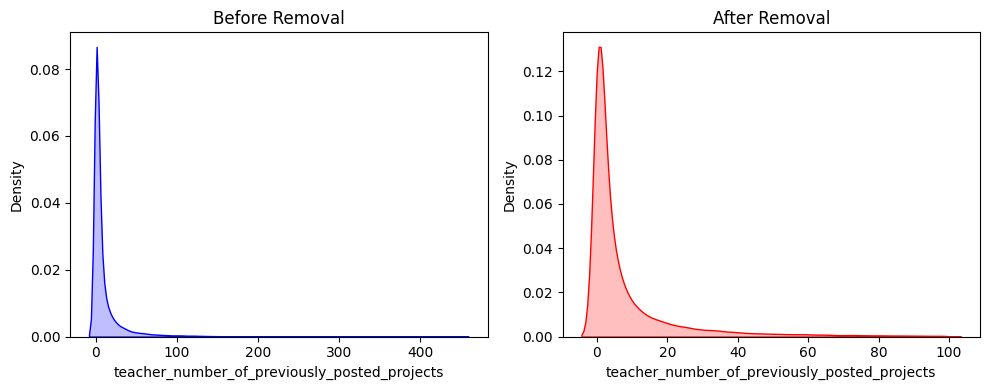

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot KDE for teacher_number_of_previously_posted_projects before removal
sns.kdeplot(df['teacher_number_of_previously_posted_projects'], color='blue', fill=True, ax=axes[0])
axes[0].set_title('Before Removal')

# remove the values for the `teacher_number_of_previously_posted_projects` is greater than 100.
df = df[df['teacher_number_of_previously_posted_projects'] < 100]

# Plot KDE for teacher_number_of_previously_posted_projects after removal
sns.kdeplot(df['teacher_number_of_previously_posted_projects'], color='red', fill=True, ax=axes[1])
axes[1].set_title('After Removal')

# Adjust spacing between subplots and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Function to plot the pdf of the feature along with the qq-plot of it's distribution.
def normality(data, feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature], color='r', fill=True)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=plt)
    plt.tight_layout()
    plt.show()

- Plot the distribution of the feature price and log transform the feature.

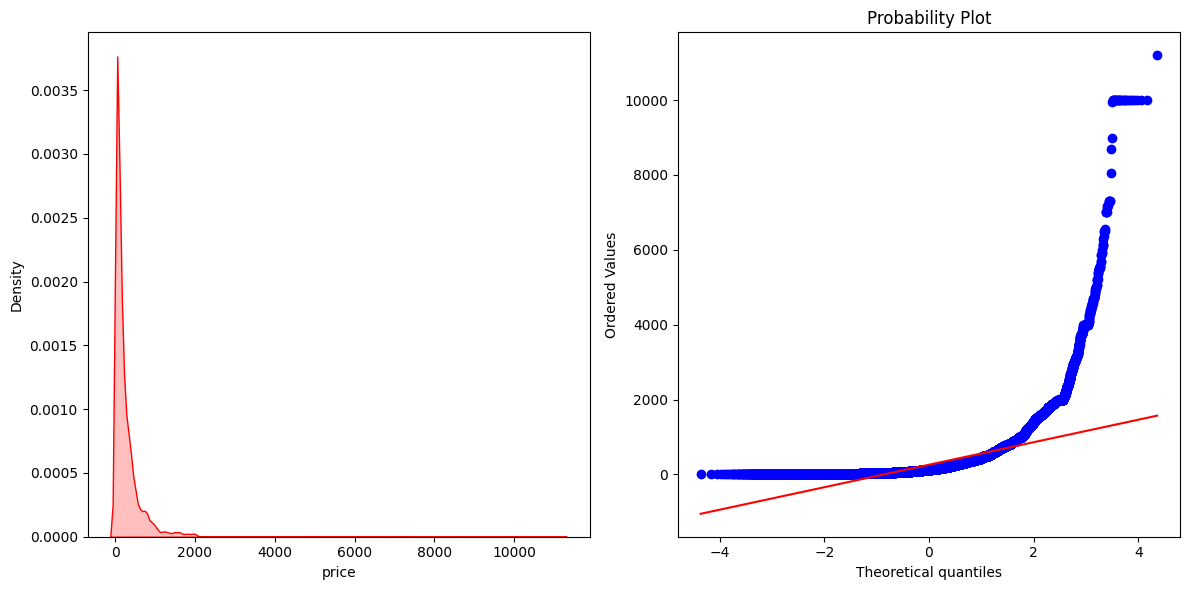

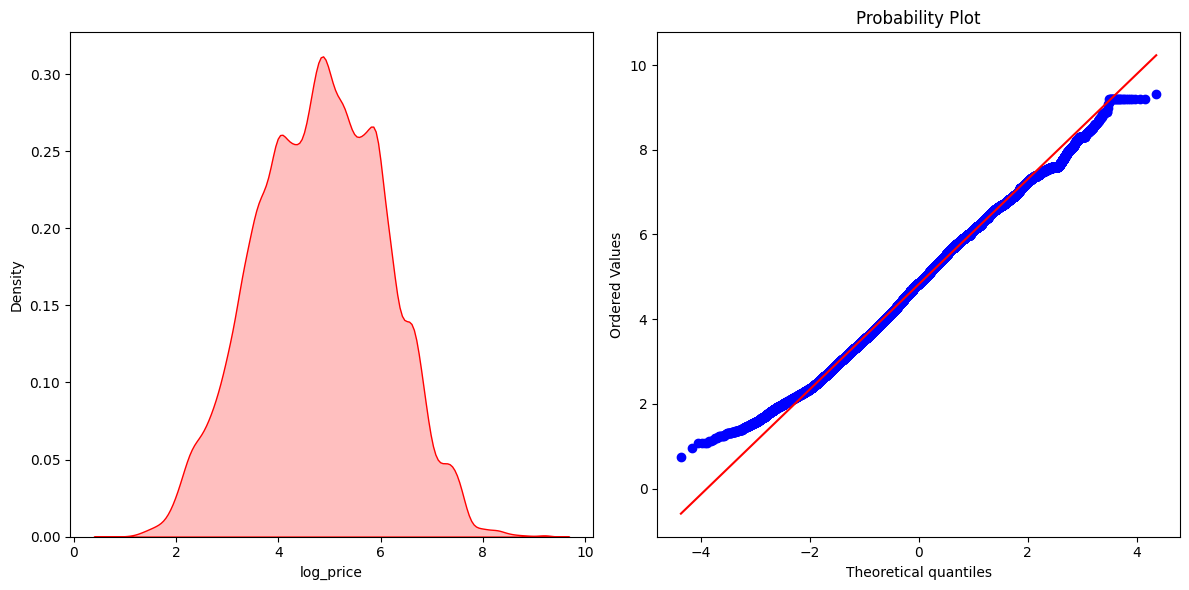

In [ ]:
# distribution of the feature price
normality(df, "price")

# As we got a right-skewed distribution for the 'price' variable. We can perform log transformation to reduce right skewness for better visualization.
df["log_price"] = np.log(df["price"].values)
normality(df, "log_price")

In [ ]:
df.drop('price', axis=1, inplace=True)
df.rename(columns = {'log_price':'price'}, inplace=True)
df['price'] = np.round(df['price'], 3)
df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,...,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,project_submitted_month,project_submitted_year,teacher_gender,project_essay,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,...,NaN,NaN,My students need opportunities to practice beg...,0,0,12,2016,Female,My students are English learners that are work...,4.445
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,...,NaN,NaN,My students need a projector to help with view...,7,1,10,2016,Male,Our students arrive to our school eager to lea...,5.700


- To enhance the analysis and create a cleaner representation of the data, we drop certain columns that do not provide significant information or exhibit redundancy.
- By removing these columns, the dataset becomes more focused, allowing for better insights and reducing unnecessary complexity.

- Clean the `project_grade_category` feature column

In [ ]:
df['project_grade_category'] = df['project_grade_category'].apply(lambda x: '_'.join(str(x.lower()).split(' ')))

- Clean the `project_subject_subcategories` feature column

In [ ]:
df['project_subject_subcategories'].value_counts()

Literacy                                        9383
Literacy, Mathematics                           8253
Literature & Writing, Mathematics               5853
Literacy, Literature & Writing                  5484
Mathematics                                     5323
                                                ... 
Economics, Nutrition Education                     1
Economics, Other                                   1
History & Geography, Warmth, Care & Hunger         1
College & Career Prep, Warmth, Care & Hunger       0
Parent Involvement, Warmth, Care & Hunger          0
Name: project_subject_subcategories, Length: 401, dtype: int64

In [ ]:
def melt_df(df, feature):
  df[['val1', 'val2', 'val_3']] = df[feature].str.split(', ', expand=True)

  # Melt the dataframe and drop the 'variable' column
  melted_df = df.melt(value_vars=['val1', 'val2', 'val_3'], value_name=feature)
  melted_df = melted_df.drop('variable', axis=1)

  # Get the count of unique values and their frequencies
  df_new = melted_df[feature].value_counts().reset_index()
  df_new.columns = [feature, 'Frequency']
  df_new = df_new.astype({feature:'category'})

  return df_new

In [ ]:
# Create dataframes to have projects approved and rejected separately for the project_subject_categories feature
df_approved = df[df['project_is_approved']==1]
df_approved = melt_df(df_approved, 'project_subject_categories')

df_rejected = df[df['project_is_approved']==0]
df_rejected = melt_df(df_rejected, 'project_subject_categories')

In [ ]:
# Create dataframes to have projects approved and rejected separately for the project_subject_subcategories feature
df_approved_sub = df[df['project_is_approved']==1]
df_approved_sub = melt_df(df_approved_sub, 'project_subject_subcategories')

df_rejected_sub = df[df['project_is_approved']==0]
df_rejected_sub = melt_df(df_rejected_sub, 'project_subject_subcategories')

In [ ]:
unwanted_cols = ['id', 'teacher_id', 'teacher_prefix', 'project_submitted_datetime', 'project_resource_summary', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4']
df.drop(unwanted_cols, axis=1, inplace=True)

# Insert the target column at the end of the DataFrame
column = df.pop('project_is_approved')
df.insert(len(df.columns), 'project_is_approved', column)

In [ ]:
df.head(2)

,Unnamed: 0,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_submitted_month,project_submitted_year,teacher_gender,project_essay,price,project_is_approved
0,160221,IN,grades_prek-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,0,12,2016,Female,My students are English learners that are work...,4.445,0
1,140945,FL,grades_6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,7,10,2016,Male,Our students arrive to our school eager to lea...,5.700,1


### Univariate and Bivariate Analysis

In [ ]:
# project_is_approved insights
df['project_is_approved'].value_counts(normalize=True)

1    0.846798
0    0.153202
Name: project_is_approved, dtype: float64

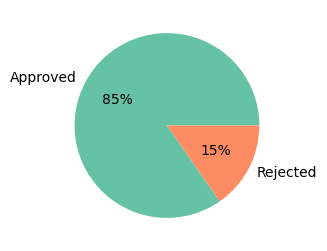

In [ ]:
plt.figure(figsize=(3, 3))
labels = ['Approved', 'Rejected']
data = df['project_is_approved'].value_counts().sort_index(ascending = False).values
plt.pie(data, labels=labels, autopct='%.0f%%', colors=plt.cm.Set2.colors)
plt.show()

Plot the density distribution for all the numerical features post data cleaning

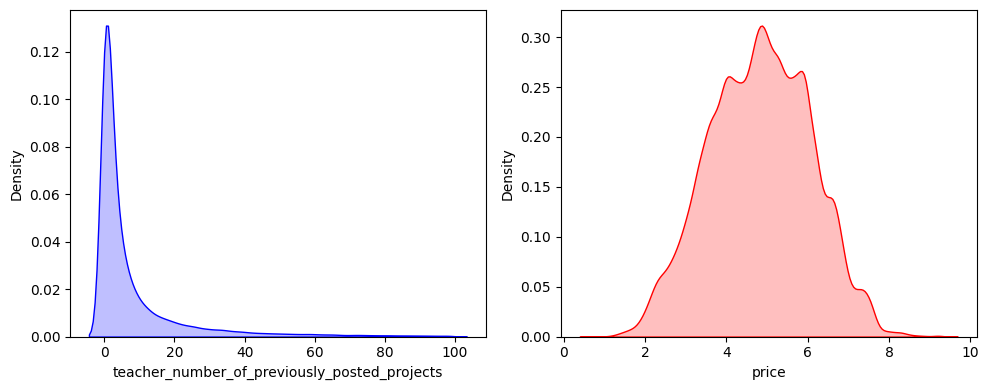

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot KDE for teacher_number_of_previously_posted_projects
sns.kdeplot(df['teacher_number_of_previously_posted_projects'], color='blue', fill=True, ax=axes[0])

# Plot KDE for price
sns.kdeplot(df['price'], color='red', fill=True, ax=axes[1])

# Adjust spacing between subplots and display the plots
plt.tight_layout()
plt.show()

Plot the project_is_approved distribution for all the categorical features post data cleaning

In [ ]:
# Use the function to plot approval rates for project_is_approved and other categorical variables
def plot_approved_vs_cat(cat_feature):
    labels = df[cat_feature].value_counts().sort_index().index.to_list()
    sns.histplot(x = df['project_is_approved'], hue=df[cat_feature], multiple="dodge",
                  stat = 'density', shrink = 0.8, common_norm=False)

    plt.legend(labels, fontsize='small')
    plt.show()


cat_cols = df.select_dtypes(include=['category']).columns.to_list()
print(cat_cols)
cat_cols.remove('project_is_approved')

['school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_submitted_month', 'project_submitted_year', 'teacher_gender', 'project_is_approved']


- Analysis for Project Subject Categories

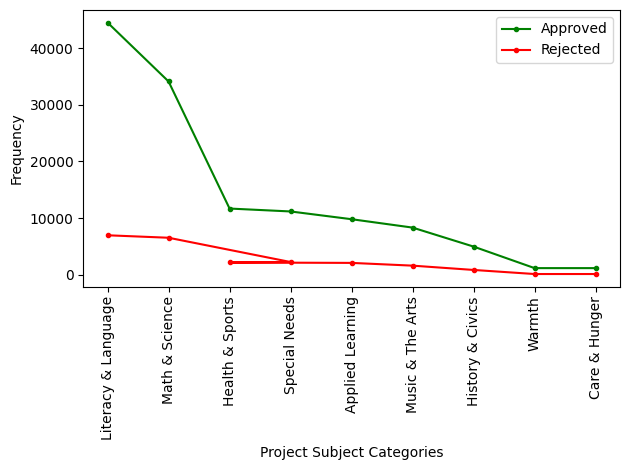

In [ ]:
# Use the function to plot project subject categories for project_is_approved
def plot_project_categories(df, c, label):
    project_categories = df['project_subject_categories'].values
    frequency = df['Frequency'].values

    # Create line plot
    plt.plot(project_categories, frequency, marker='.', linestyle='-', color=c, label=label)

    # Set plot title and labels
    plt.xlabel('Project Subject Categories')
    plt.ylabel('Frequency')
    plt.legend()

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

# Create a new figure and subplot
fig, ax = plt.subplots()

# Plot approved projects
plot_project_categories(df_approved, 'g', 'Approved')

# Plot rejected projects
plot_project_categories(df_rejected, 'r', 'Rejected')

# Set layout and display the plot
plt.tight_layout()
plt.show()

- Analysis for Project Subject Subcategories

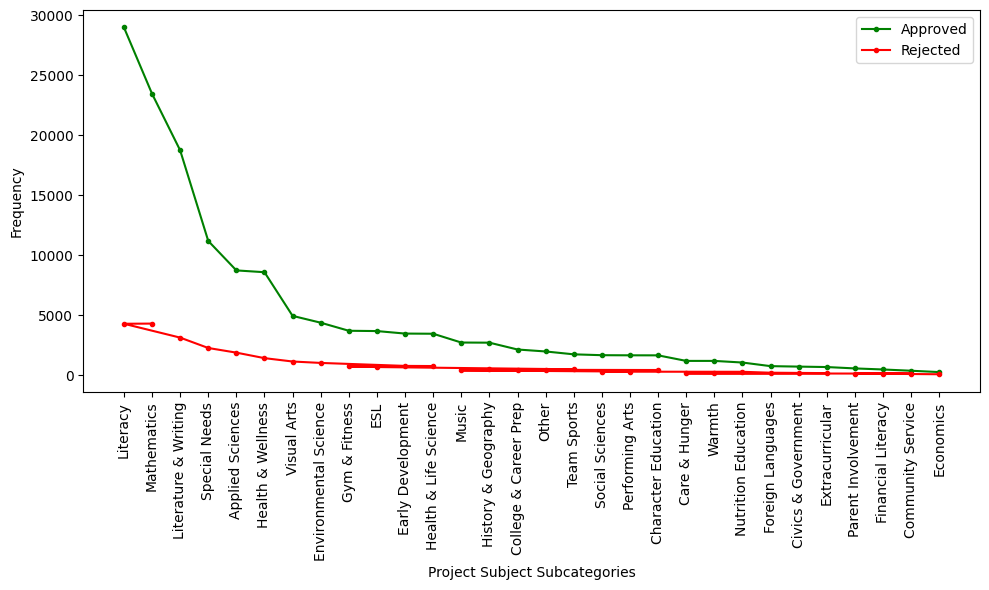

In [ ]:
# Use the function to plot project subject subcategories for project_is_approved
def plot_project_subcategories(df, c, label):
    project_subcategories = df['project_subject_subcategories'].values
    frequency = df['Frequency'].values

    # Create line plot
    plt.plot(project_subcategories, frequency, marker='.', linestyle='-', color=c, label=label)

    # Set plot title and labels
    plt.xlabel('Project Subject Subcategories')
    plt.ylabel('Frequency')
    plt.legend()

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

# Create a new figure and subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot approved projects
plot_project_subcategories(df_approved_sub, 'g', 'Approved')

# Plot rejected projects
plot_project_subcategories(df_rejected_sub, 'r', 'Rejected')

# Set layout and display the plot
plt.tight_layout()
plt.show()

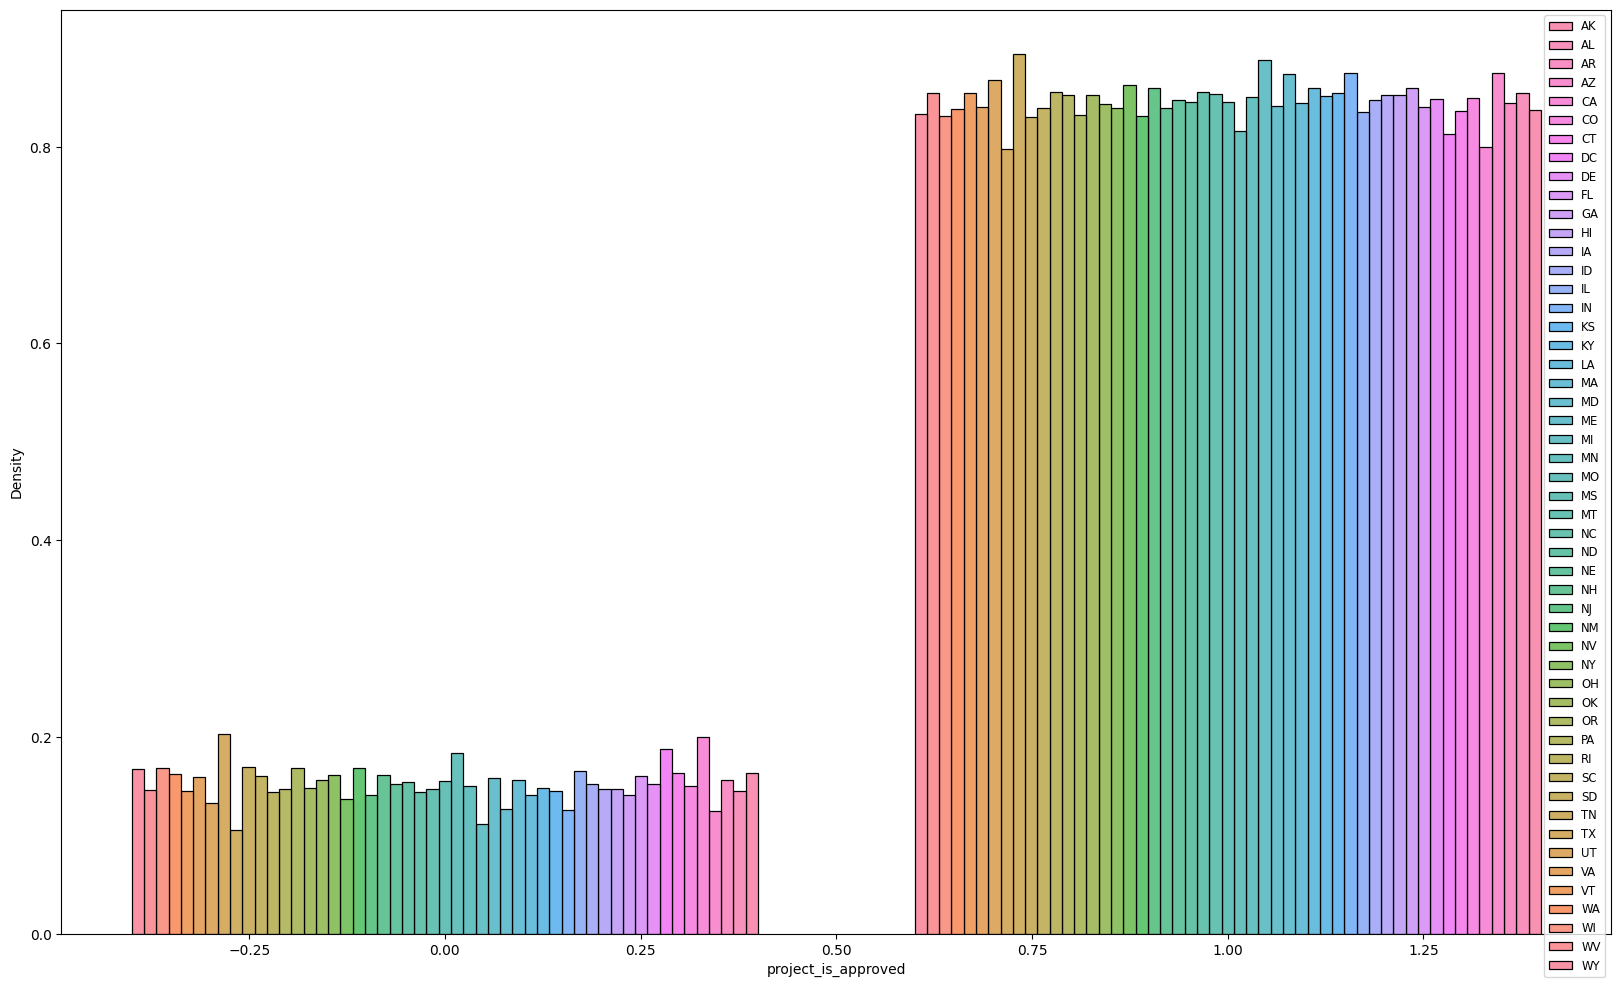

In [ ]:
# project_is_approved vs school_state
plt.figure(figsize=(20, 12))
plot_approved_vs_cat('school_state')

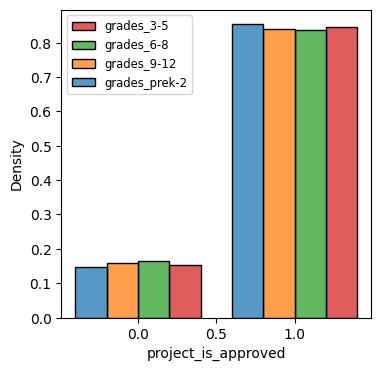

In [ ]:
# project_is_approved vs project_grade_category
plt.figure(figsize=(4, 4))
plot_approved_vs_cat('project_grade_category')

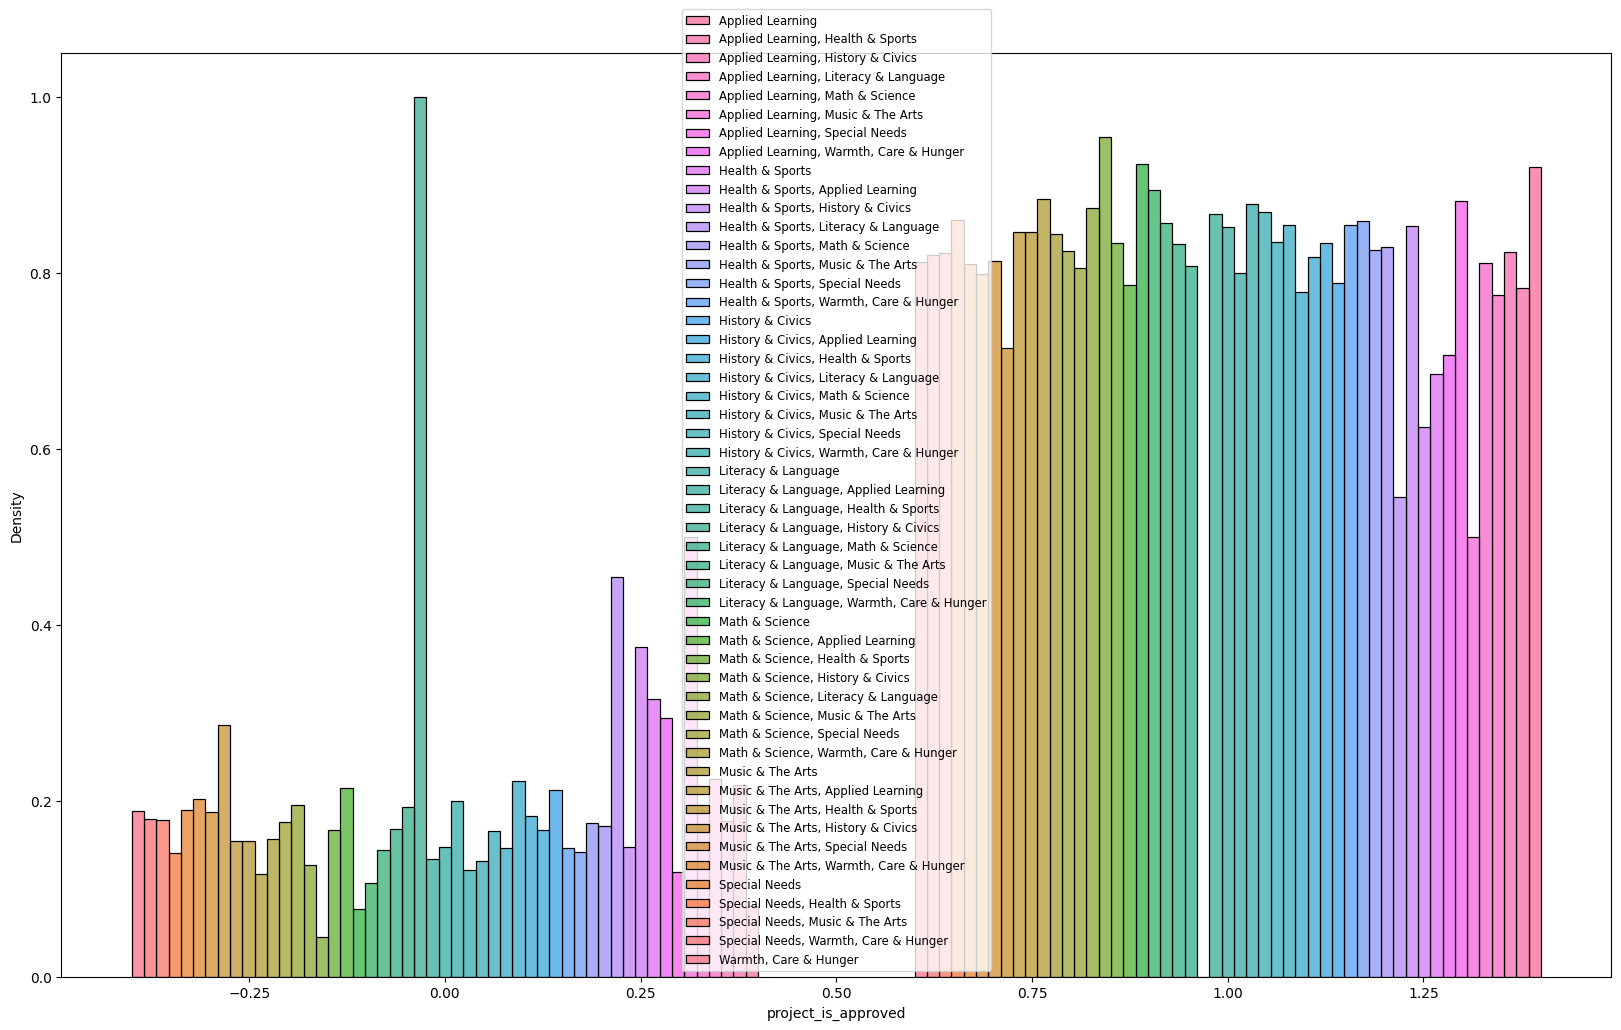

In [ ]:
# project_is_approved vs project_subject_categories
plt.figure(figsize=(20, 12))
plot_approved_vs_cat('project_subject_categories')

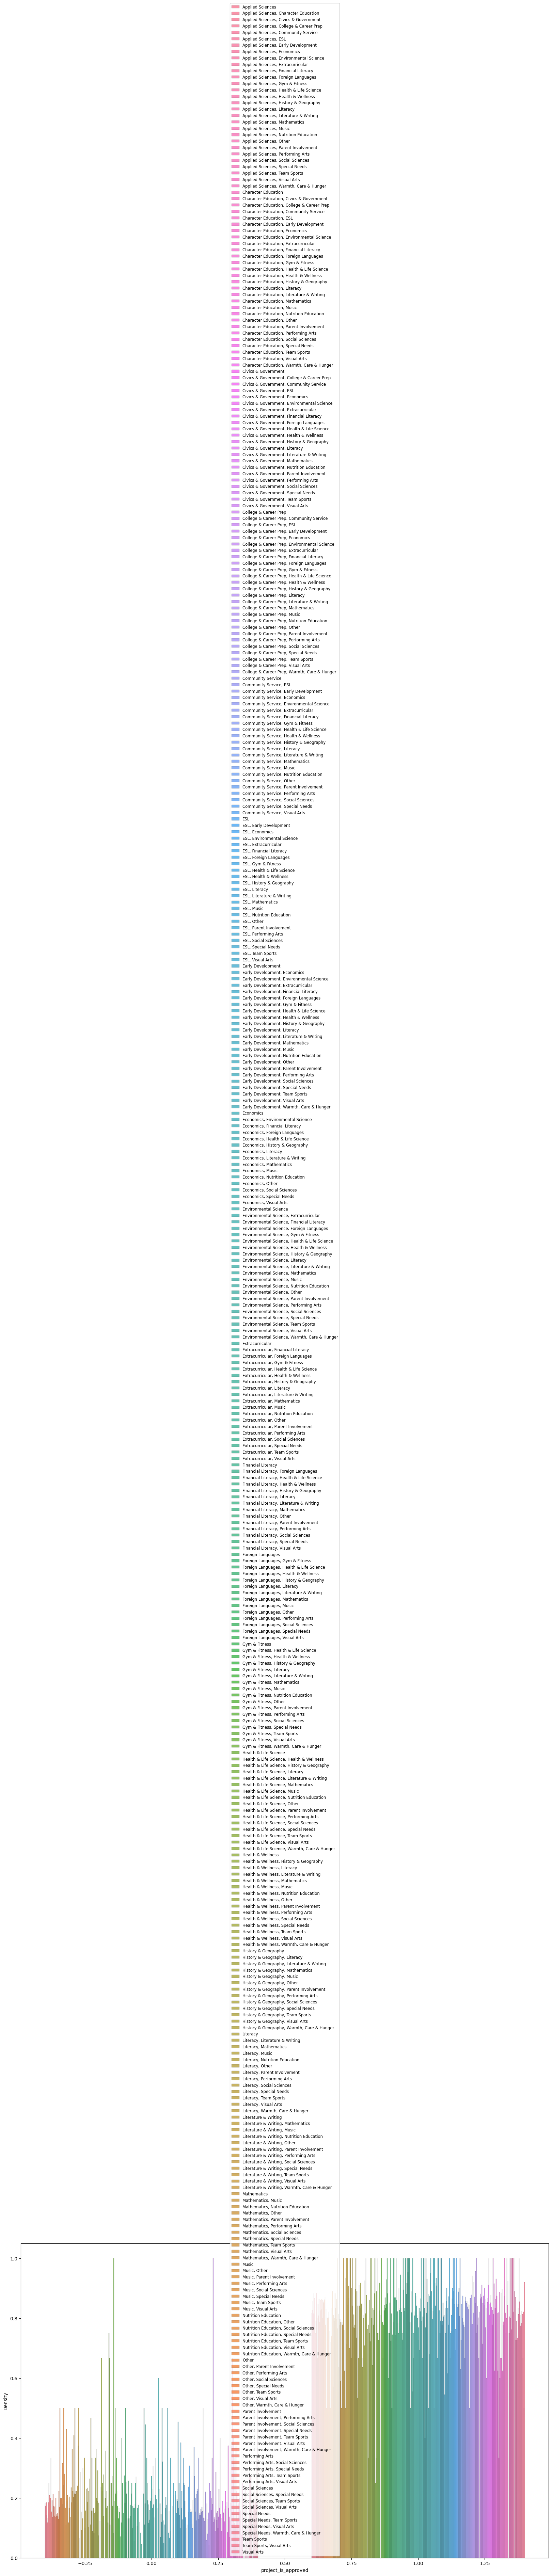

In [ ]:
# project_is_approved vs project_subject_subcategories
plt.figure(figsize=(20, 12))
plot_approved_vs_cat('project_subject_subcategories')

In [ ]:

cat_cols = df.select_dtypes(include=['category']).columns.to_list()
print(cat_cols)
cat_cols.remove('project_is_approved')

['school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_submitted_month', 'project_submitted_year', 'teacher_gender', 'project_is_approved']


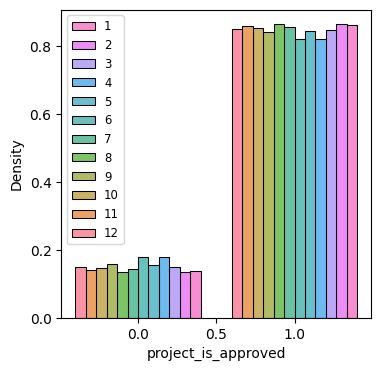

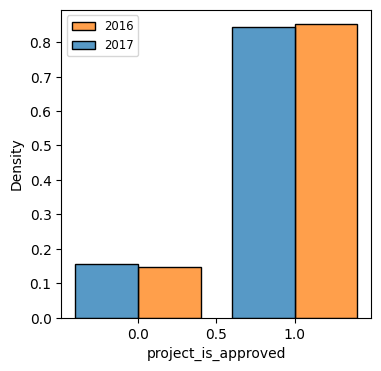

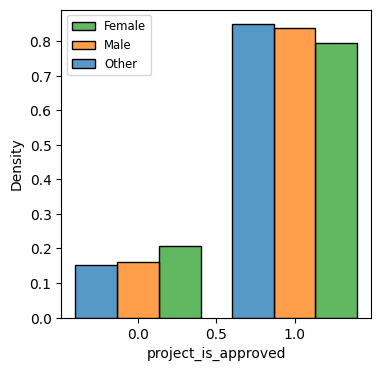

In [ ]:
# project_is_approved vs categorical attributes
for feature in cat_cols[4:]:
  plt.figure(figsize=(4, 4))
  plot_approved_vs_cat(feature)

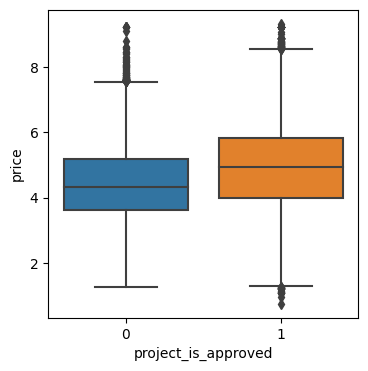

In [ ]:
# project_is_approved vs price
plt.figure(figsize=(4, 4))
ax = sns.boxplot(x=df['project_is_approved'], y=df['price'], whis=1.5)
plt.show()

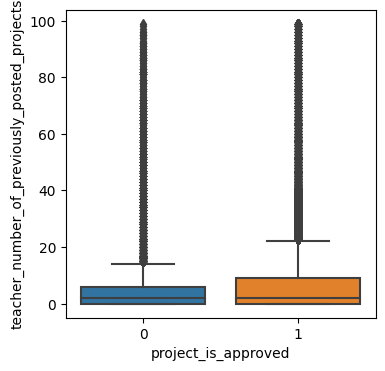

In [ ]:
# project_is_approved vs teacher_number_of_previously_posted_projects
plt.figure(figsize=(4, 4))
ax = sns.boxplot(x=df['project_is_approved'], y=df['teacher_number_of_previously_posted_projects'], whis=1.5)
plt.show()

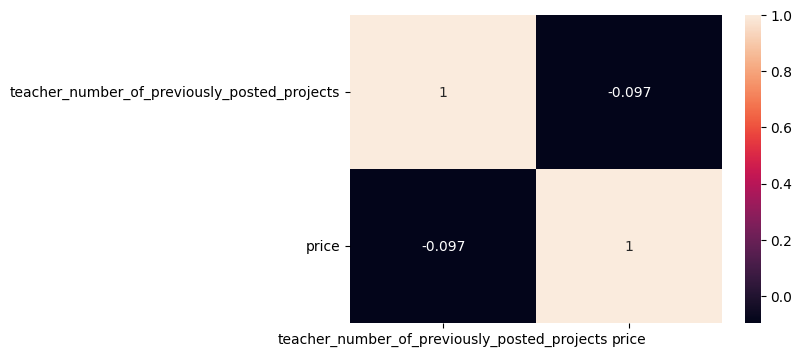

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

- 85% of the project submitted were approved.
- The median of the price for the approved projects is higher as compared to the ones that got rejected.
- The project approval status does not show a strong association or dependency on the analyzed categorical features. This lack of significant difference implies that these categorical features do not play a substantial role in determining the approval or rejection of projects.


- Clean the `project_subject_categories` feature column

In [ ]:
df['project_subject_categories'] = df['project_subject_categories'].str.replace(' & ', '_').str.replace(' ', '_')
df['project_subject_categories'] = df['project_subject_categories'].str.replace(',_', ' ')

- Clean the `project_subject_subcategories` feature column

In [ ]:
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(' & ', '_').str.replace(' ', '_')
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(',_', ' ')

In [ ]:
df.head(2)

,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_submitted_month,project_submitted_year,teacher_gender,price,project_essay,project_is_approved
0,IN,grades_prek-2,Literacy_Language,ESL Literacy,Educational Support for English Learners at Home,0,12,2016,Female,4.445,My students are English learners that are work...,0
1,FL,grades_6-8,History_Civics Health_Sports,Civics_Government Team_Sports,Wanted: Projector for Hungry Learners,7,10,2016,Male,5.700,Our students arrive to our school eager to lea...,1


In [ ]:
df.shape

(107035, 12)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/DonorsChoose/processed_data_1.csv", index=False)

In [ ]:
pp_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DonorsChoose/processed_data_1.csv")
pp_1.head(3)

,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_submitted_month,project_submitted_year,teacher_gender,price,project_essay,project_is_approved
0,IN,grades_prek-2,Literacy_Language,ESL Literacy,Educational Support for English Learners at Home,0,12,2016,Female,4.445,My students are English learners that are work...,0
1,FL,grades_6-8,History_Civics Health_Sports,Civics_Government Team_Sports,Wanted: Projector for Hungry Learners,7,10,2016,Male,5.700,Our students arrive to our school eager to lea...,1
2,AZ,grades_6-8,Health_Sports,Health_Wellness Team_Sports,Soccer Equipment for AWESOME Middle School Stu...,1,8,2016,Female,3.967,"True champions arent always the ones that win,...",0


#### Preprocessing:

We would first need to process the data that we have using the techniques:

1. Split the `project_essay` into sentences.
2. For each sentence in the corpus -
    1. Convert the sentence to lowercase
    2. Expand contractions
    3. Lemmatization
    4. Remove stopwords
    5. Remove punctuations

In [ ]:
def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence

In [ ]:
# tqdm to see real time progress
from tqdm.notebook import tqdm
tqdm.pandas()

nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_essay(essay_text, nlp_object):
    processed_essay_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(essay_text):
        # preprocessing each sentence using our process_sentence function
        processed_essay_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragraphs of the essay
    return " ".join(processed_essay_sentences)

In [ ]:
df["processed_project_essay"] = df["project_essay"].progress_apply(lambda x : process_essay(x, nlp))
df["processed_project_title"] = df["project_title"].progress_apply(lambda x : process_essay(x, nlp))

In [ ]:
df["processed_project_subject_categories"] = df["project_subject_categories"].progress_apply(lambda x : process_essay(x, nlp))
df["processed_project_subject_subcategories"] = df["project_subject_subcategories"].progress_apply(lambda x : process_essay(x, nlp))

  0%|          | 0/107035 [00:00<?, ?it/s]

  0%|          | 0/107035 [00:00<?, ?it/s]

In [ ]:
pp_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Scaler/Portfolio Project/DonorsChoose/processed_data_2.csv")
pp_2.head(3)

,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_submitted_month,project_submitted_year,teacher_gender,price,project_essay,project_is_approved,processed_project_essay,processed_project_title,processed_project_subject_categories,processed_project_subject_subcategories
0,IN,grades_prek-2,Literacy_Language,ESL Literacy,Educational Support for English Learners at Home,0,12,2016,Female,4.445,My students are English learners that are work...,0,student english learner work english second la...,educational support english learner home,literacy language,esl literacy
1,FL,grades_6-8,History_Civics Health_Sports,Civics_Government Team_Sports,Wanted: Projector for Hungry Learners,7,10,2016,Male,5.700,Our students arrive to our school eager to lea...,1,student arrive school eager learn polite gene...,want projector hungry learner,history civic health sport,civics government team sport
2,AZ,grades_6-8,Health_Sports,Health_Wellness Team_Sports,Soccer Equipment for AWESOME Middle School Stu...,1,8,2016,Female,3.967,"True champions arent always the ones that win,...",0,true champion one win gut mia hamm quote good...,soccer equipment awesome middle school student,health sport,health wellness team sport


In [ ]:
pp_2.iloc[0][['processed_project_title','processed_project_essay']]

processed_project_title             educational support english learner home
processed_project_essay    student english learner work english second la...
Name: 0, dtype: object

In [ ]:
pp_2.iloc[0][['processed_project_subject_categories','processed_project_subject_subcategories']]

processed_project_subject_categories       literacy language
processed_project_subject_subcategories         esl literacy
Name: 0, dtype: object

In [ ]:
pp_2.shape

(107035, 16)

In [ ]:
pprint(pp_2.iloc[0]['processed_project_essay'], compact=True)
# print(df.iloc[0]['processed_project_essay'])

('student english learner work english second language  melting pot refugee '
 'immigrant nativeborn americans bring gift language school  24 language '
 'represent english learner program student level mastery  40 country '
 'represent family school  student bring wealth knowledge experience open eye '
 'new culture belief respect  limit language limit world ludwig wittgenstein '
 'english learner strong support system home beg resource  time parent learn '
 'read speak english child  create barrier parent able help child learn '
 'phonetic letter recognition reading skills by provide dvds player student '
 'able continue mastery english language home able assist  family student '
 'level 1 proficiency status offer program  educational video specially choose '
 'english learner teacher send home regularly watch  video help child develop '
 'early reading skills parent access dvd player opportunity check dvd player '
 'use year  plan use video educational dvds year come el student  stu

In [ ]:
pp_2.fillna('', inplace=True)

In [ ]:
pp_2.isnull().sum()/len(pp_2) * 100

school_state                                    0.0
project_grade_category                          0.0
project_subject_categories                      0.0
project_subject_subcategories                   0.0
project_title                                   0.0
teacher_number_of_previously_posted_projects    0.0
project_submitted_month                         0.0
project_submitted_year                          0.0
teacher_gender                                  0.0
price                                           0.0
project_essay                                   0.0
project_is_approved                             0.0
processed_project_essay                         0.0
processed_project_title                         0.0
processed_project_subject_categories            0.0
processed_project_subject_subcategories         0.0
dtype: float64

In [ ]:
# import pickle

# pp_2.to_pickle("/content/drive/MyDrive/Colab Notebooks/DonorsChoose/Processed_data_final.pkl")
# pp_2.to_csv("/content/drive/MyDrive/Colab Notebooks/DonorsChoose/Processed_data_final.csv", index=False)